# Data Exploration

In this notebook, we will be diving a little deeper into the exploration of our drug survey respondent dataset and visualize some of the underlying patterns/trends/correlations. 

Lets start of by importing the necessary packages as well as our dataset which we will be using throughout the notebook:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Loading the Data

In [3]:
df = pd.read_csv("../data/respondent_data_clean.csv", index_col=0)
df.head()

,age,gender,education,residing_country,race,n_score,e_score,o_score,a_score,c_score,...,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
0,35-44,Female,Professional Certificate/Diploma,UK,Biracial - White/Asian,39.0,36.0,42.0,37.0,42.0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,25-34,Male,Doctorate Degree,UK,White,29.0,52.0,55.0,48.0,41.0,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,35-44,Male,Professional Certificate/Diploma,UK,White,31.0,45.0,40.0,32.0,34.0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,18-24,Female,Masters Degree,UK,White,34.0,34.0,46.0,47.0,46.0,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,35-44,Female,Doctorate Degree,UK,White,43.0,28.0,43.0,41.0,50.0,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1876
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1877 non-null   object 
 1   gender            1877 non-null   object 
 2   education         1877 non-null   object 
 3   residing_country  1877 non-null   object 
 4   race              1877 non-null   object 
 5   n_score           1877 non-null   float64
 6   e_score           1877 non-null   float64
 7   o_score           1877 non-null   float64
 8   a_score           1877 non-null   float64
 9   c_score           1877 non-null   float64
 10  i_score           1877 non-null   float64
 11  s_score           1877 non-null   float64
 12  alcohol           1877 non-null   object 
 13  amphet            1877 non-null   object 
 14  amyl              1877 non-null   object 
 15  benzos            1877 non-null   object 
 16  caffeine          1877 non-null   object 


## Exploring the Personality Variables

The first step in this exploration will be to further explore the numerical variables, i.e., the variables representing the different aspects of personality. Lets first separate this data from the table, and then we can look at some scatterplots to discern the various correlations between these variables.

Again, lets just make note of what each score represents:

**n_score** - represents neuroticism (which is one's disposition to experience negative emotions such as anger or anxiety) 

**e_score** - represents extraversion (which represents how outgoing or social an individual is)

**o_score** - represents one's openness to experience or trying new things

**a_score** - represents agreeableness or one's ability to put others' needs over their own (can be associated with altruistic or empathetic behavior)

**c_score** - represents conscientiousness or the tendency to adhere to norms/rules and do what is right. 

**i_score** - represents impulsivity or tendency to act without thinking/on impulse.

**s-score** - represents sensation-seeking or one's tendency to search for experiences and feelings.



In [5]:
df.columns

Index(['age', 'gender', 'education', 'residing_country', 'race', 'n_score',
       'e_score', 'o_score', 'a_score', 'c_score', 'i_score', 's_score',
       'alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis',
       'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroin', 'ketamine',
       'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa'],
      dtype='object')

In [6]:
#Separating the numerical data
numerical_data = df[['n_score','e_score','o_score','a_score','c_score','i_score','s_score']]
numerical_data.head()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score
0,39.0,36.0,42.0,37.0,42.0,4.0,3.0
1,29.0,52.0,55.0,48.0,41.0,3.0,6.0
2,31.0,45.0,40.0,32.0,34.0,2.0,8.0
3,34.0,34.0,46.0,47.0,46.0,2.0,3.0
4,43.0,28.0,43.0,41.0,50.0,4.0,6.0


Text(0.5, 1.0, 'Pairplots of Personality Variables')

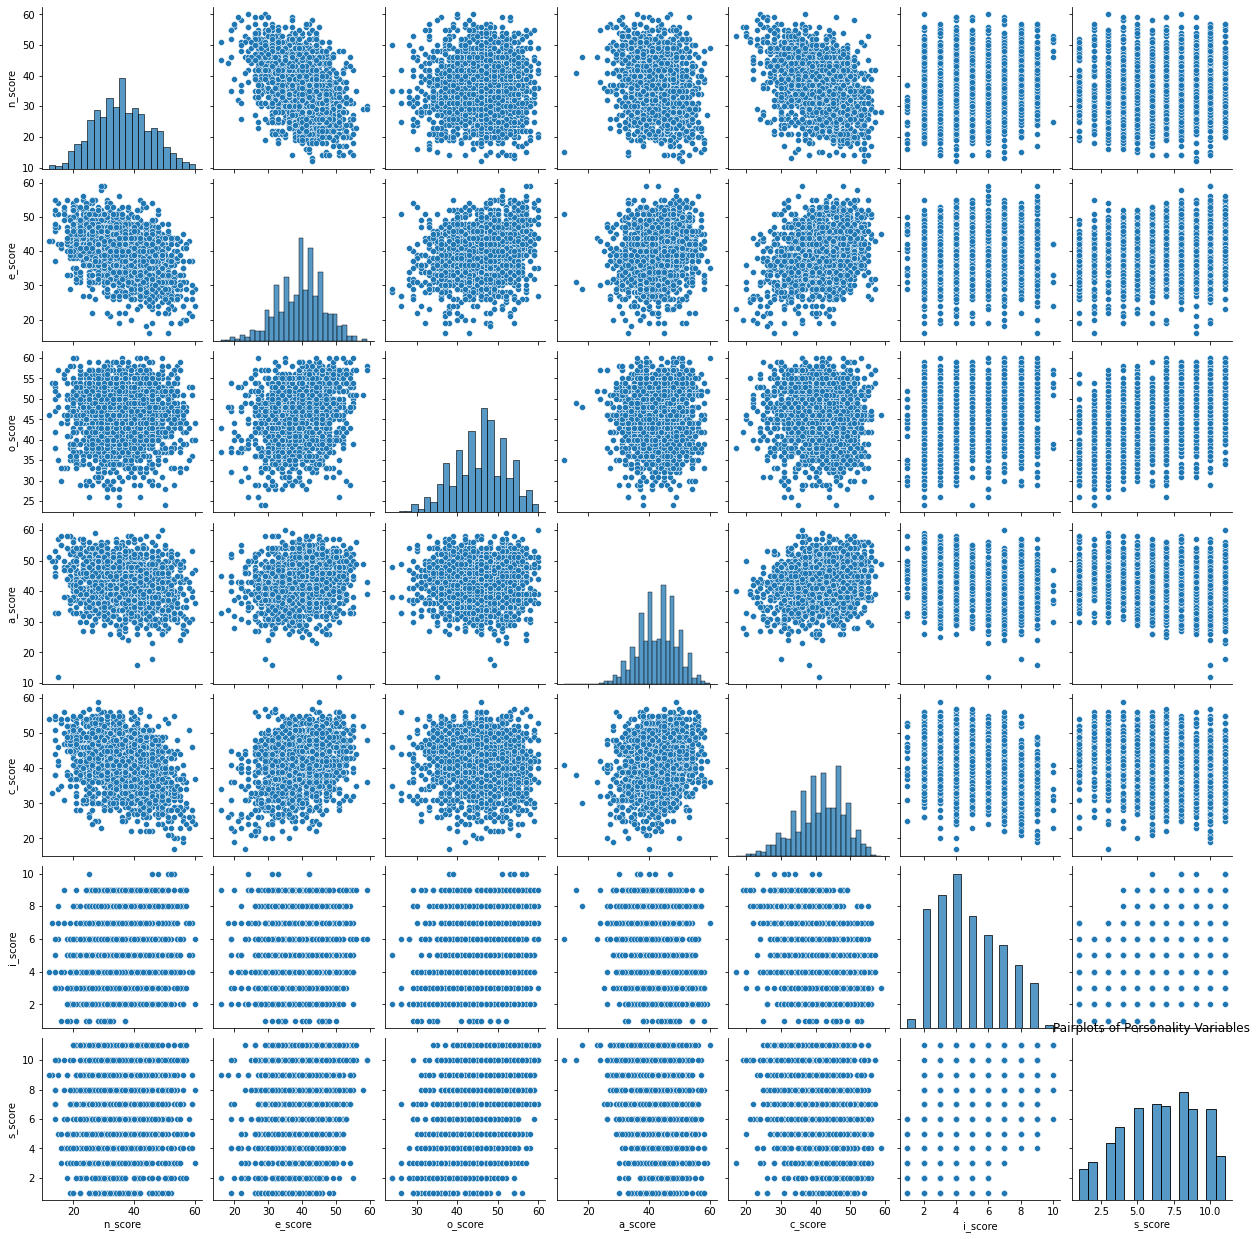

In [7]:
#Lets create pairplots of these variables using the seaborn package

sns.pairplot(numerical_data)
plt.title('Pairplots of Personality Variables')

<AxesSubplot:>

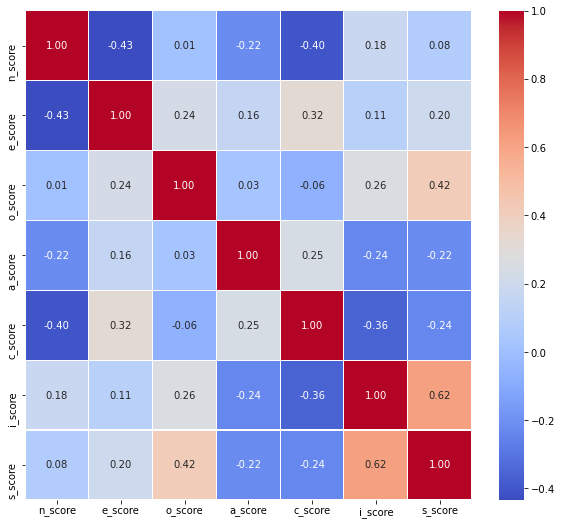

In [8]:
# Let's also make a heatmap of the data 
plt.figure(figsize=(10,9))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=.05)

We can see that there are not very many strong linear relationships between our numerical variables that are worth noting. The strongest relation is between the i_score and the s_score, but this can just be due to the fact that there simply are not as many options for observation values for these two scores as there are for the other variables. 

### Summary Statistics of Numerical Data

Let's look as at some of the basic summary statistics of these variables, as well as how these summary statistics change when we group them by some of the respondent description variables (age, gender, education).

In [9]:
numerical_data.describe()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,35.917421,39.564198,45.744806,42.864145,41.436335,4.795418,6.550346
std,9.137606,6.772165,6.577274,6.433950,6.967241,2.119993,2.694511
min,12.000000,16.000000,24.000000,12.000000,17.000000,1.000000,1.000000
25%,29.000000,35.000000,41.000000,39.000000,37.000000,3.000000,5.000000
50%,36.000000,40.000000,46.000000,43.000000,42.000000,4.000000,7.000000
75%,42.000000,44.000000,51.000000,48.000000,46.000000,6.000000,9.000000
max,60.000000,59.000000,60.000000,60.000000,59.000000,10.000000,11.000000


#### Numerical Data Grouped by Gender

In [10]:
#Means for each personality score, grouped by gender
df.groupby('gender').mean()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score
gender,,,,,,,
Female,36.545358,39.983991,44.831377,44.280683,42.708645,4.441836,5.862327
Male,35.291489,39.145745,46.655319,41.452128,40.168085,5.147872,7.236170


##### Personality Trait Boxplots for each Gender

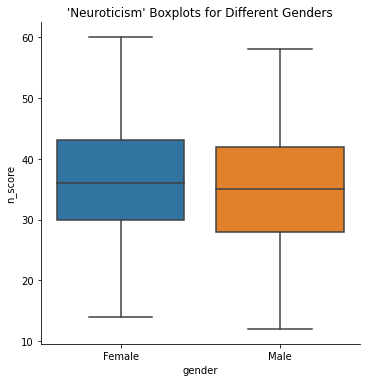

In [11]:
sns.catplot(x='gender',y='n_score',data=df, kind='box')
plt.title("'Neuroticism' Boxplots for Different Genders")
plt.show()

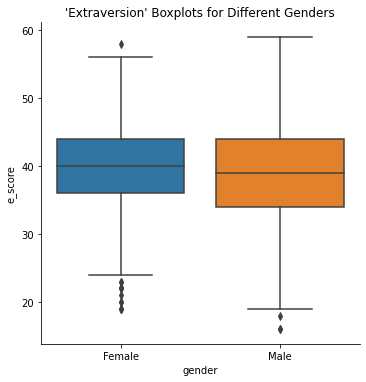

In [12]:
sns.catplot(x='gender',y='e_score',data=df, kind='box')
plt.title("'Extraversion' Boxplots for Different Genders")
plt.show()

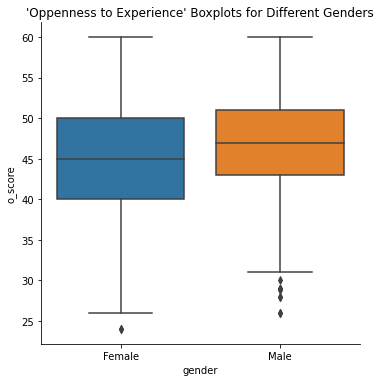

In [13]:
sns.catplot(x='gender',y='o_score',data=df, kind='box')
plt.title("'Oppenness to Experience' Boxplots for Different Genders")
plt.show()

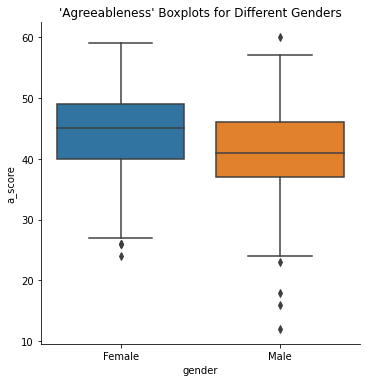

In [14]:
sns.catplot(x='gender',y='a_score',data=df, kind='box')
plt.title("'Agreeableness' Boxplots for Different Genders")
plt.show()

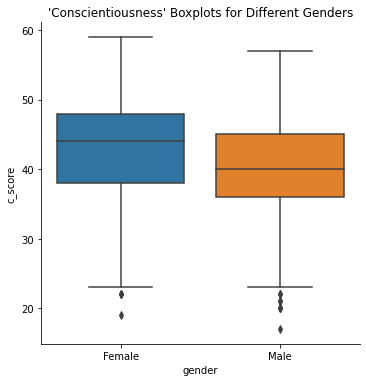

In [15]:
sns.catplot(x='gender',y='c_score',data=df, kind='box')
plt.title("'Conscientiousness' Boxplots for Different Genders")
plt.show()

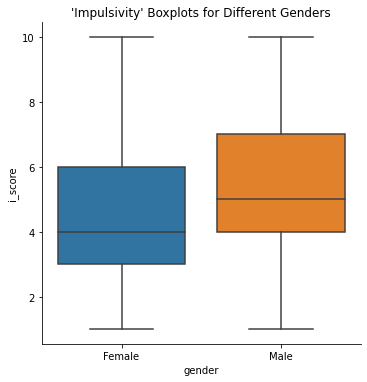

In [16]:
sns.catplot(x='gender',y='i_score',data=df, kind='box')
plt.title("'Impulsivity' Boxplots for Different Genders")
plt.show()

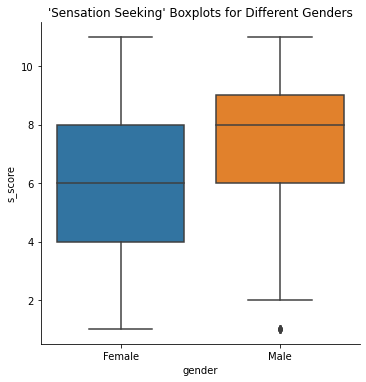

In [17]:
sns.catplot(x='gender',y='s_score',data=df, kind='box')
plt.title("'Sensation Seeking' Boxplots for Different Genders")
plt.show()

##### Statistical Significance Testing for differences in Personality between Genders

Let's now look at the statistical significance of the difference in means between gender groups for some of the personality scores. We will start with i-score (impulsivity). Our null hypothesis for each of these tests will be that there is no statistically significant difference. 

We will conduct standard frequentist t-tests for all of our statistical tests. The p-value of our observed data represents the proportion of the data given the null that's at least as extreme as our observed data. We're going to count how many of the differences in our difference list are at least as extreme as our observed difference.

For this report, we will conduct 10 statistical tests in total, so using the Bonferroni Correction and a significant value of 0.05, our corrected p-value going forward will be 0.005. 

So, if we find a proportion of our differences at least as extreme as our observed difference to be less than or equal to 0.005 of them are, then we will reject the Null hypothesis.

In [18]:
#Split data by gender
male = df[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']

In [19]:
from scipy.stats import ttest_ind
ttest_ind(male.i_score, female.i_score, equal_var = True)

Ttest_indResult(statistic=7.314558192280121, pvalue=3.808344489483829e-13)

We see a p-value well below 0.005, so we reject the null hypothesis and conclude that there is a statistically significant difference in impulsivity between males and females. Let's now try c-score (conscientiousness).

In [20]:
ttest_ind(male.c_score, female.c_score, equal_var = True)

Ttest_indResult(statistic=-8.031547204130606, pvalue=1.6836718694483834e-15)

Once again, we can reject the null hypothesis that there is no difference in conscientiousness between males and females. These tests are quite informative in looking at the behaviors of our samples. Lastly, let us try the same for s-score (sensation seeking).  

In [21]:
ttest_ind(male.s_score, female.s_score, equal_var = True)

Ttest_indResult(statistic=11.419400069823293, pvalue=3.0218359292244017e-29)

Again, we can reject our null hypothesis that there is no difference in the means for sensation-seeking between males and females. Let's move on to exploring differences in our personality scores with different age groups.

#### Numerical Data Grouped by Age

We should first note from our data wrangling notebook that there are far fewer observations from those aged 65+ than there are from those aged 18-24. Shown below, 637 (or about 34%) of the respondents are 18-24, while only about 18 (or about 1%) are 65+. Since this sample size of those 65+ is so small, it makes sense for us to combine the 55-64 and 65+ age groups to just be 55+.

In [22]:
df['age'].value_counts()

18-24    637
25-34    480
35-44    355
45-54    294
55-64     93
65+       18
Name: age, dtype: int64

In [23]:
df['age'] = df['age'].replace(['55-64','65+'],['55+','55+'])
df['age'].value_counts()

18-24    637
25-34    480
35-44    355
45-54    294
55+      111
Name: age, dtype: int64

In [24]:
df.groupby('age').mean()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score
age,,,,,,,
18-24,37.059655,39.623234,47.836735,42.254317,39.477237,5.368917,7.701727
25-34,36.529167,39.939583,45.520833,43.037500,41.960417,4.729167,6.577083
35-44,35.780282,39.008451,44.000000,42.746479,42.425352,4.402817,5.732394
45-54,33.965986,39.765306,44.316327,44.149660,43.057823,4.255102,5.517007
55+,32.324324,38.846847,44.072072,42.585586,42.954955,4.477477,5.180180


It is interesting to note that the means for neuroticism, oppenness to experience, impulsivity, and sensation seeking go down as age increases, and the means for conscientiousness increase as one gets older. Although we do not know whether these differences are statistically significant without doing some further hypothesis testing, etc., we can still see that these observations make some sense in the fact that younger people are generally more likely to be more impulsive/neurotic and open to new experiences and sensations, while older people are more likely to adhere to norms. 

Now, let's visualize the summary statistics for these variables for each age group using boxplots: 

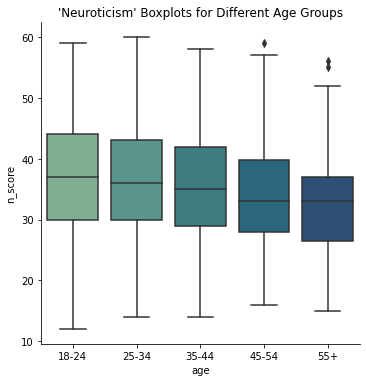

In [25]:
sns.catplot(x='age',y='n_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Neuroticism' Boxplots for Different Age Groups")
plt.show()

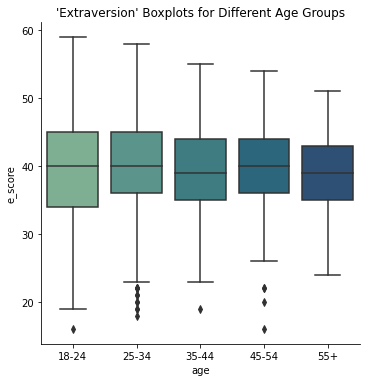

In [26]:
sns.catplot(x='age',y='e_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Extraversion' Boxplots for Different Age Groups")
plt.show()

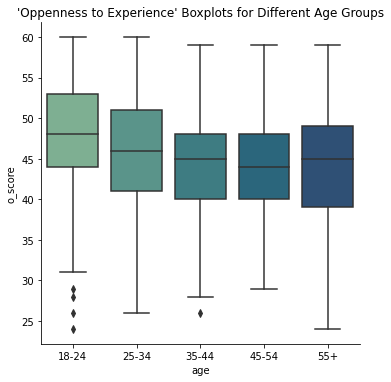

In [27]:
sns.catplot(x='age',y='o_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Oppenness to Experience' Boxplots for Different Age Groups")
plt.show()

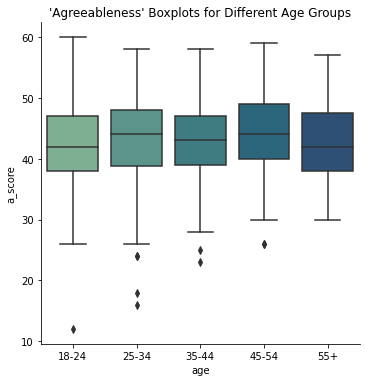

In [28]:
sns.catplot(x='age',y='a_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Agreeableness' Boxplots for Different Age Groups")
plt.show()

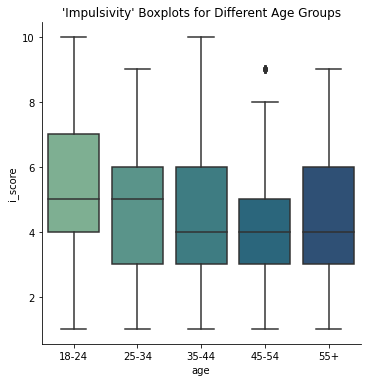

In [29]:
sns.catplot(x='age',y='i_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Impulsivity' Boxplots for Different Age Groups")
plt.show()

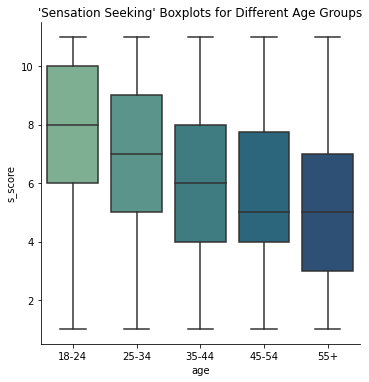

In [30]:
sns.catplot(x='age',y='s_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Sensation Seeking' Boxplots for Different Age Groups")
plt.show()

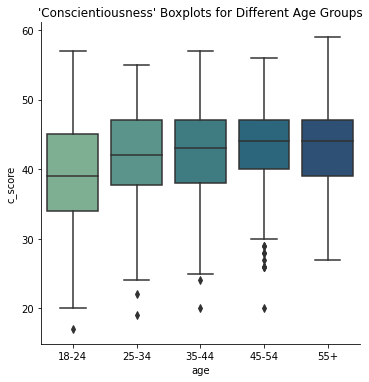

In [31]:
sns.catplot(x='age',y='c_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Conscientiousness' Boxplots for Different Age Groups")
plt.show()

##### Statistical Testing for Difference in Means of Personality Features for different Age Groups

It seems the s-score seems to have the most steady decline in median values as age increases and most significant difference in values in regards to max and min means. Let's do a t-test to figure out if the difference in means for the personality variables between age 18-24 and age 55+ are significant or not. Our null hypothesis will be that there is no significant difference for each score between the two age groups. Let's start with s-score.

In [32]:
young = df[df.age == '18-24']
old = df[df.age == '55+']

In [33]:
ttest_ind(young.s_score, old.s_score, equal_var = True)

Ttest_indResult(statistic=10.450135655438933, pvalue=5.994893594184389e-24)

We got a value of 5.99e-24, which is basically zero! So at a bonferroni corrected alpha level of 0.005, we reject our null hypothesis and conclude there is something else going on that is causing us to observe older people to be less likely to look for new sensations than younger people (though this does make perfect sense as older people are generally more content with life and are not looking for new experiences as much as younger people)! Let's do the same for n_score, which we also observed to have quite a difference between the two age groups. 

In [34]:
ttest_ind(young.n_score, old.n_score, equal_var = True)

Ttest_indResult(statistic=4.950771932246505, pvalue=9.146076223924197e-07)

Again, we got a p-value very close to zero, so we reject the null hypothesis that the n scores are the same between the two groups and conclude something else is causing a difference in neuroticism in our sample. Let's try i-score next.

In [35]:
ttest_ind(young.i_score, old.i_score, equal_var = True)

Ttest_indResult(statistic=4.13211532822557, pvalue=4.0016208863453847e-05)

We reject the null hypothesis that there is no statistically significant difference in impulsivity between age groups in our sample. 

Let's now move onto the different education groupings. 

#### Numerical Data Grouped by Education

We should again note from our data wrangling notebook that there are very little observations for those who left school before 16, at 16, at 17, at 18, as well as those with doctorate degrees (shown below). Let's again combine some of these categories since the samples are so small for some. Particularly, lets make a new category called "Left School Before College" which combines Left School before 16, at 16, at 17, at 18, as well as make a new category called "Graduate Degree" which combines "Masters Degree" and "Doctorate Degree".

In [36]:
df['education'].value_counts()

Attending College/No Certificate or Degree    503
University Degree                             478
Masters Degree                                283
Professional Certificate/Diploma              270
Left School at 18                              99
Left School at 16                              98
Doctorate Degree                               89
Left School at 17                              29
Left School before 16                          28
Name: education, dtype: int64

In [37]:
df['education'] = df['education'].replace(['Left School before 16','Left School at 16', 'Left School at 17', 'Left School at 18', 'Masters Degree', 'Doctorate Degree'],
                                          ['Left School before College','Left School before College', 'Left School before College', 'Left School before College', 'Graduate Degree', 'Graduate Degree'])
df['education'].value_counts()

Attending College/No Certificate or Degree    503
University Degree                             478
Graduate Degree                               372
Professional Certificate/Diploma              270
Left School before College                    254
Name: education, dtype: int64

In [38]:
df.groupby('education').mean()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score
education,,,,,,,
Attending College/No Certificate or Degree,37.123260,39.041750,47.791252,42.071571,38.658052,5.443340,7.624254
Graduate Degree,34.067204,40.986559,46.244624,43.956989,44.209677,4.236559,5.889785
Left School before College,36.696850,38.255906,43.334646,42.255906,40.070866,4.791339,6.437008
Professional Certificate/Diploma,35.770370,39.329630,43.800000,43.129630,42.096296,4.770370,6.018519
University Degree,35.757322,39.834728,45.581590,43.020921,42.554393,4.564854,6.294979


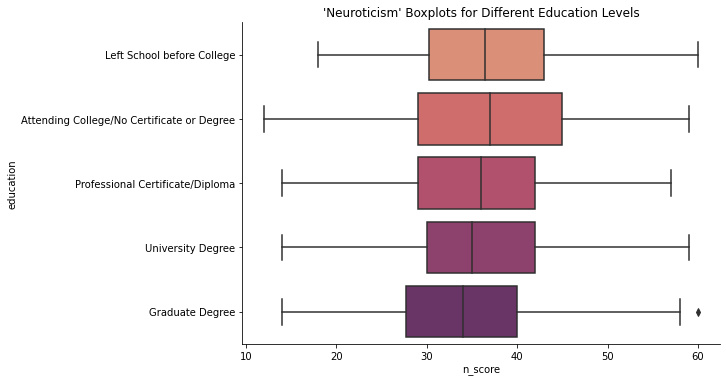

In [39]:
sns.catplot(x='n_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Neuroticism' Boxplots for Different Education Levels")

plt.show()

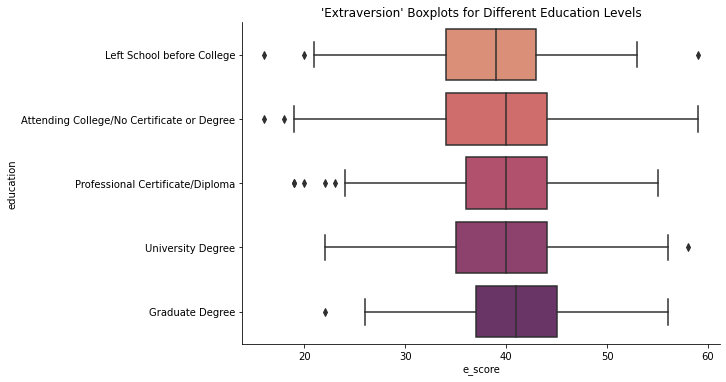

In [40]:
sns.catplot(x='e_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Extraversion' Boxplots for Different Education Levels")

plt.show()

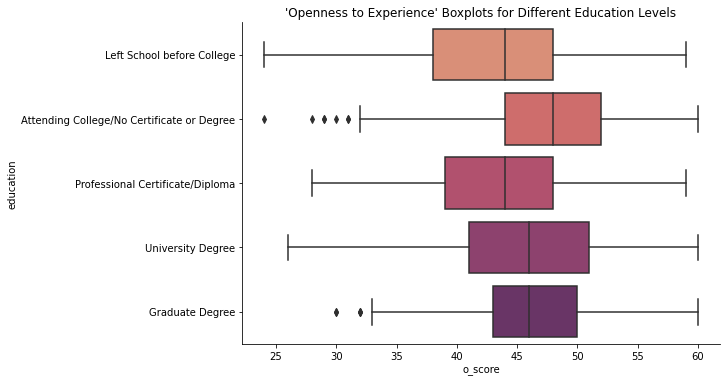

In [41]:
sns.catplot(x='o_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Openness to Experience' Boxplots for Different Education Levels")

plt.show()

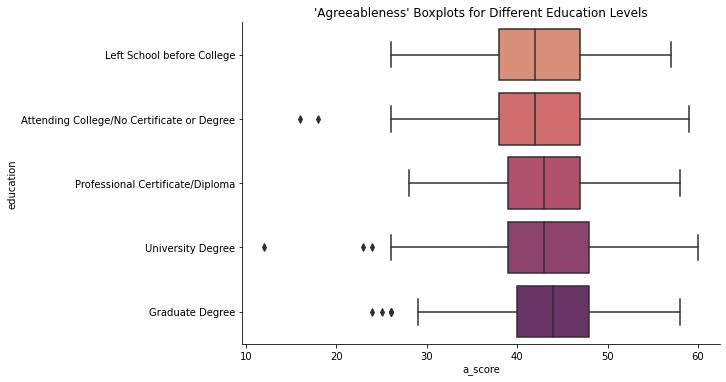

In [42]:
sns.catplot(x='a_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Agreeableness' Boxplots for Different Education Levels")

plt.show()

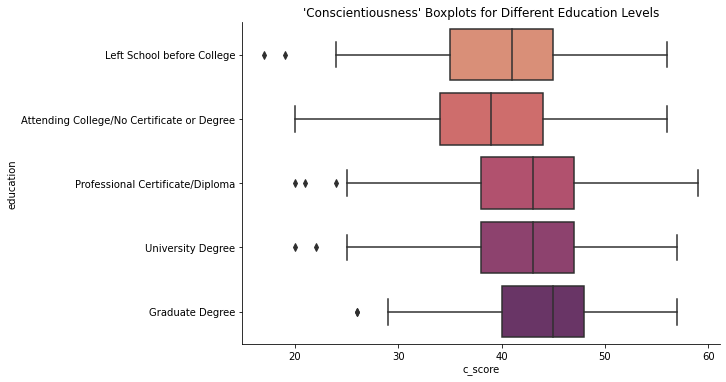

In [43]:
sns.catplot(x='c_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Conscientiousness' Boxplots for Different Education Levels")

plt.show()

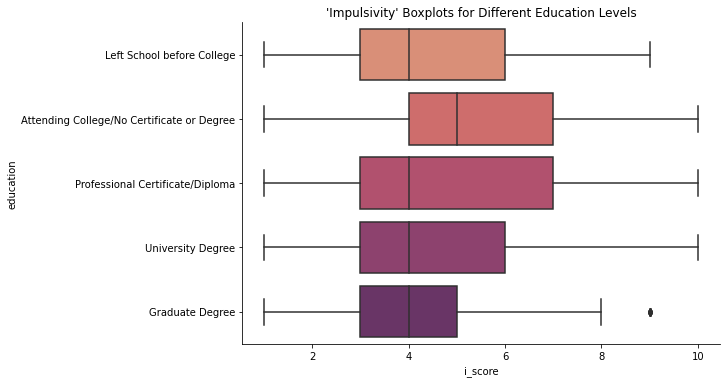

In [44]:
sns.catplot(x='i_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Impulsivity' Boxplots for Different Education Levels")

plt.show()

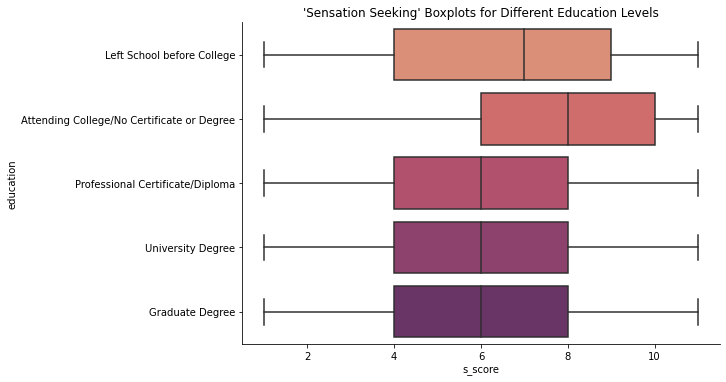

In [45]:
sns.catplot(x='s_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Sensation Seeking' Boxplots for Different Education Levels")

plt.show()

It is interesting to note that conscientiousness tends to go up with education level, which makes sense in that people are more likely to adhere to societal norms as they increase their formal education and join the work force. It is also interesting to note that those currently attending college have much higher values for sensation seeking and openess to experience, which again makes sense as those in undergraduate are exploring themselves and are very open to trying new things. 

##### Statistical Testing for Difference in Means of Personality Features for different Age Groups

Let's again do some statistical t-tests to understand the significance of these findings. We can start with the difference in means of o-score between those currently attending college and those who left school before college.

In [46]:
attending_college = df[df.education == 'Attending College/No Certificate or Degree']
left_before = df[df.education == 'Left School before College']

ttest_ind(attending_college.o_score, left_before.o_score, equal_var = True)

Ttest_indResult(statistic=8.769385530963051, pvalue=1.1806881766694308e-17)

We get a p-value of about zero! So we reject the null hypothesis and conclude there is a statistically significant difference in the oppeness to experience between those currently attending college and those who left school before college. Now, we will look at whether there is a signifcant difference in impulsivity between those who left school before college and those attending college. 

In [47]:
ttest_ind(attending_college.i_score, left_before.i_score, equal_var = True)

Ttest_indResult(statistic=3.880071475858795, pvalue=0.00011354535463515853)

We see with an alpha level of 0.005 that we can again reject the null hypothesis and conclude that the higher impulsivity we see in those attending college is significant. Let's also look at the difference in agreeableness and conscientiousness between those who left school before college and those who have a graduate degree. 

In [48]:
grad_degree = df[df.education == 'Graduate Degree']
ttest_ind(grad_degree.a_score, left_before.a_score, equal_var = True)

Ttest_indResult(statistic=3.3631758320730367, pvalue=0.0008176671394775663)

In [49]:
ttest_ind(grad_degree.c_score, left_before.c_score, equal_var = True)

Ttest_indResult(statistic=7.894356421218508, pvalue=1.3168509723270948e-14)

We reject the null hypothesis for both and find there may be a statistical difference in agreeableness and coscientiousness between those who left school before attending college and those who have obtained a graduate degree. 

Lets now begin looking at some of our drug consumption categories.

## Exploring the Drug Consumption Variables

We should now begin to explore some of our drug consumption variables, particulary those that we are interested in predicting (alcohol, cocaine, benzodiazepines). Remember, for all drug attributes, the values range from CL0-CL6, where:
    
    CL0 = Never Used 
    CL1 = Used over a Decade Ago 
    CL2 = Used in Last Decade
    CL3 = Used in Last Year 
    CL4 = Used in Last Month 
    CL5 = Used in Last Week 
    CL6 = Used in Last Day 

Let's first look at basic distributions of these variables. 

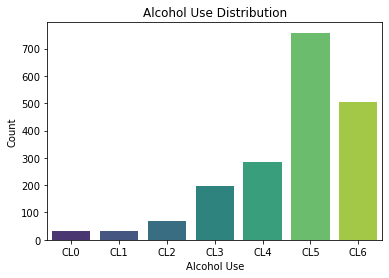

In [50]:
order=['CL0','CL1','CL2','CL3','CL4','CL5','CL6']
sns.countplot(x='alcohol', data=df, order=order, palette='viridis')
plt.xlabel('Alcohol Use')
plt.ylabel('Count')
plt.title('Alcohol Use Distribution')
plt.show()

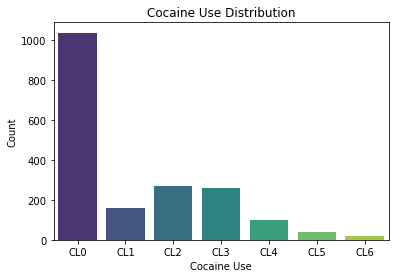

In [51]:
sns.countplot(x='cocaine', data=df, order=order, palette='viridis')
plt.xlabel('Cocaine Use')
plt.ylabel('Count')
plt.title('Cocaine Use Distribution')
plt.show()

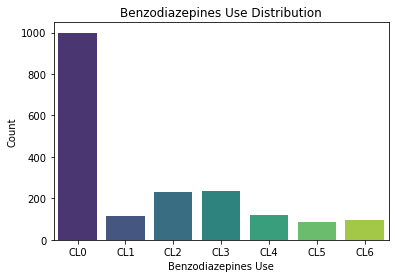

In [52]:
sns.countplot(x='benzos', data=df, order=order, palette='viridis')
plt.xlabel('Benzodiazepines Use')
plt.ylabel('Count')
plt.title('Benzodiazepines Use Distribution')
plt.show()

We can see that the majority of respondents are somewhat regular alcohol users, while the majority of respondents have never used cocaine or benzos.It is important to note that alcohol is a legal, recreational substance so it is not very hard to believe the distribution above. Cocaine is an illegal substance, while Benzos are prescription drugs (used to treat anxiety, insomnia, and seizures) that can be obtained/abused legally or illegally. 

### Drug Consumption by Gender

We will now look at these three drug consumption distributions for each gender. With the help of some code from the below article written by KSV Muralidhar, we will first define a function that will allow us to plot the drug category distributions for each gender, age, and education groups as 100% stacked bar charts. 

https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

In [53]:
def stacked_bar(x, y, colormap, xlabel, title):
    #Create cross tabulation for proportion for each age/education category
    cross_tab_prop = pd.crosstab(index=df[x], 
                                 columns=df[y], 
                                 normalize="index")
    cross_tab = pd.crosstab(index=df[x], 
                            columns=df[y])
    #create stacked bar chart
    cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap=colormap, 
                        figsize=(10, 10))
    plt.legend(bbox_to_anchor=(1.0, 1.0), 
               loc='upper left')
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.ylabel("Proportions")
    plt.title(title)
    
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):
                
            plt.text(x=n-0.06,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=10,
                     fontweight="bold")

    plt.show()

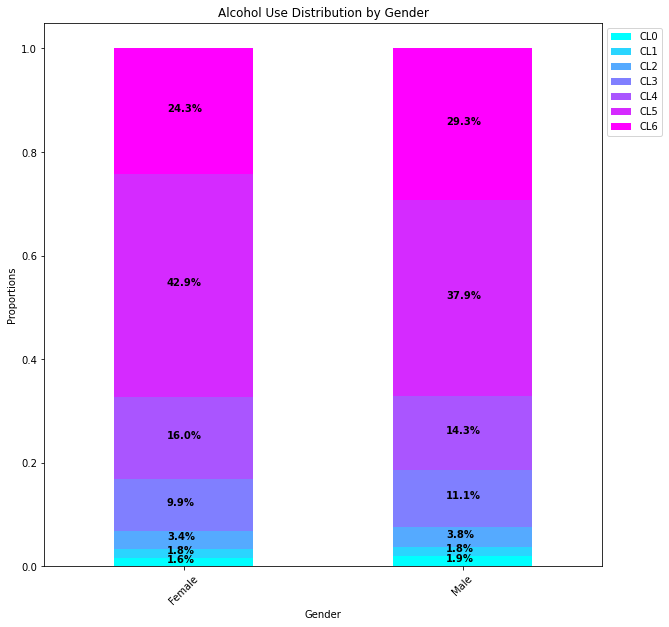

In [54]:
stacked_bar('gender', 'alcohol', 'cool', 'Gender','Alcohol Use Distribution by Gender')

Remember that we have about the same number of male and female respondents in our data. It is interesting to note that there are more male alcohol users in the last day than females, while more female users in the past week than male. While this may not mean anything, it could possibly suggest that there are more regular male alcohol consumers (possibly alcohol abusers) than female. 

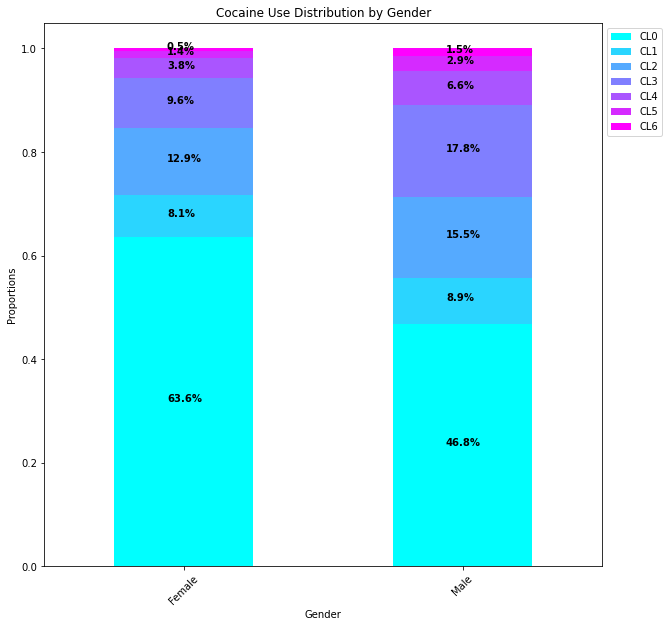

In [55]:
stacked_bar('gender', 'cocaine', 'cool', 'Gender','Cocaine Use Distribution by Gender')

It seems more men have tried (or continue to use) cocaine than women.

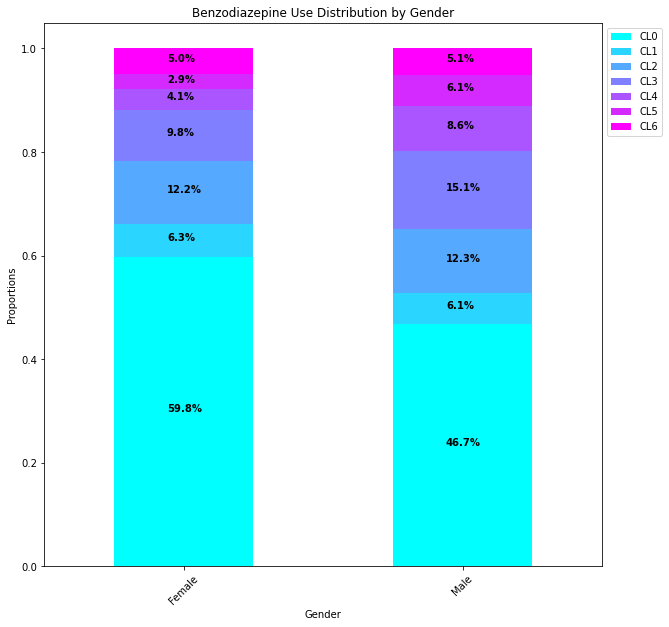

In [56]:
stacked_bar('gender', 'benzos', 'cool', 'Gender','Benzodiazepine Use Distribution by Gender')

Again, we see that for the most part, men use benzos more than females. However, once we look at those who used in the last day, it is about equal, which could possibly be due to the fact that equal numbers of men and women get prescribed such drugs to treat anxiety, insomnia, etc. 

### Drug Consumption by Age

We will now look at these three drug consumption distributions for each age group. 

In [57]:
df['age'].value_counts(normalize=True)

18-24    0.339371
25-34    0.255727
35-44    0.189132
45-54    0.156633
55+      0.059137
Name: age, dtype: float64

Since we see that the number of respondents per age group are not very similar, it will be important to look at not only the distribution of age groups per drug use response, but also the distribution of drug use per age group. 

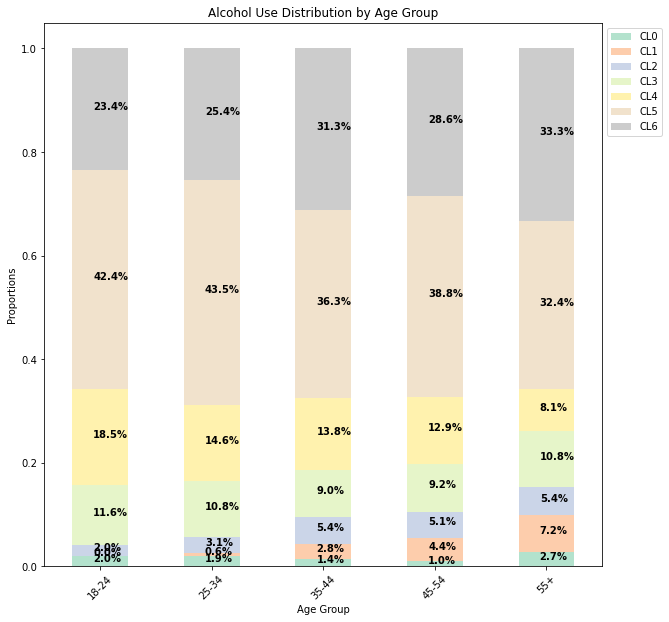

In [58]:
stacked_bar('age', 'alcohol', 'Pastel2', 'Age Group','Alcohol Use Distribution by Age Group')

We can see that the distributions of alcohol use per age group remain quite similar as age increases, until we get to the 55+ age group. 

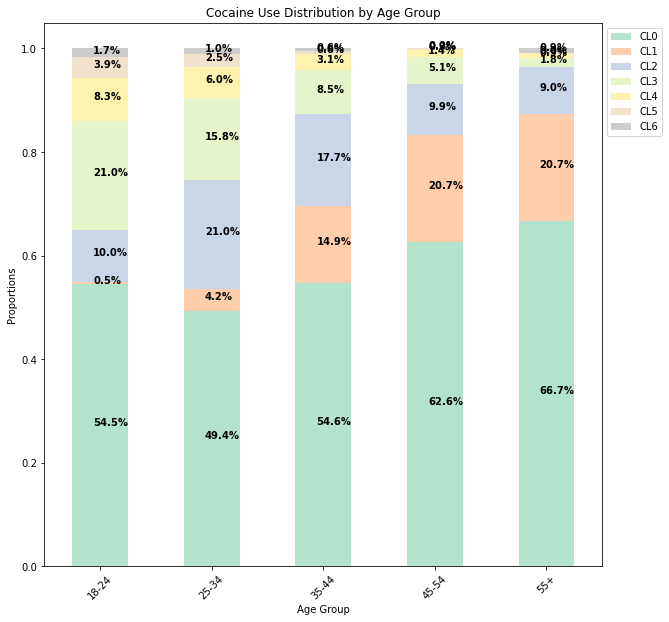

In [59]:
stacked_bar('age', 'cocaine', 'Pastel2', 'Age Group','Cocaine Use Distribution by Age Group')

We see as age increases, the 'CL1' category (representing "Used over a Decade Ago") increases, which makes sense since most users probably did this drug in their youth (18-30). Again, however, we can see that the distributions of cocaine use per age group remain quite similar as age increases.

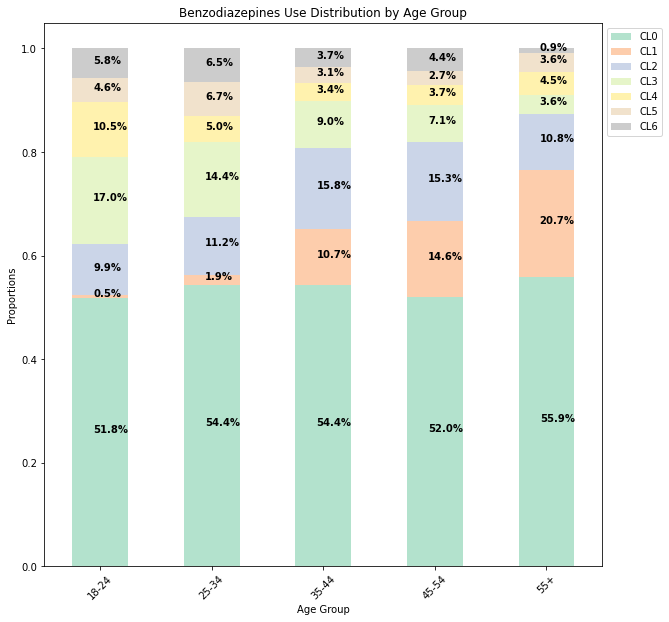

In [60]:
stacked_bar('age', 'benzos', 'Pastel2', 'Age Group','Benzodiazepines Use Distribution by Age Group')

Again, we see as age increases, the 'CL1' category (representing "Used over a Decade Ago") increases, which makes sense since most users probably did not do this drug before 18. 

### Drug Consumption by Education

In [61]:
df['education'].value_counts(normalize=True)

Attending College/No Certificate or Degree    0.267981
University Degree                             0.254662
Graduate Degree                               0.198189
Professional Certificate/Diploma              0.143847
Left School before College                    0.135322
Name: education, dtype: float64

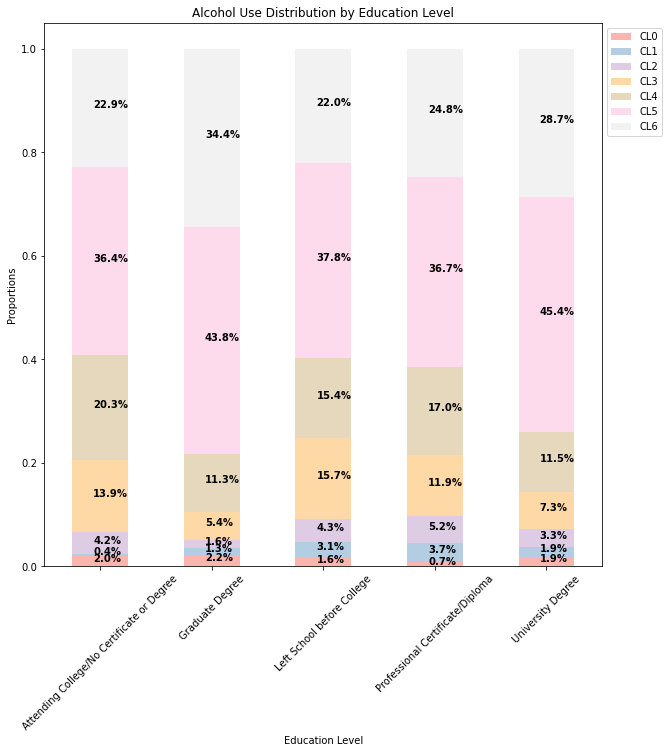

In [62]:
stacked_bar('education', 'alcohol', 'Pastel1', 'Education Level','Alcohol Use Distribution by Education Level')

We can see that those with a graduate degree hold the respondents who drink alcohol the most, followed by those with a university degree. Those who left left school before college tend to drink the least. We can see the vast majority of respondents do drink alcohol and have done so in the last day, week, or month. 

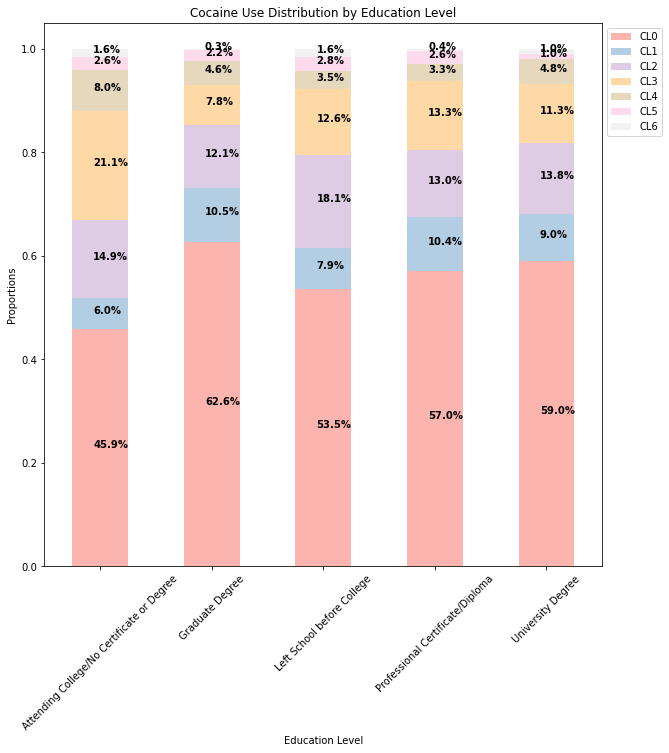

In [63]:
stacked_bar('education', 'cocaine', 'Pastel1', 'Education Level','Cocaine Use Distribution by Education Level')

We see the distributions of cocaine use per education level are quite similar. The vast majority have never used cocaine. We see those attending college hold the largest group of respondents who use or have used cocaine. 

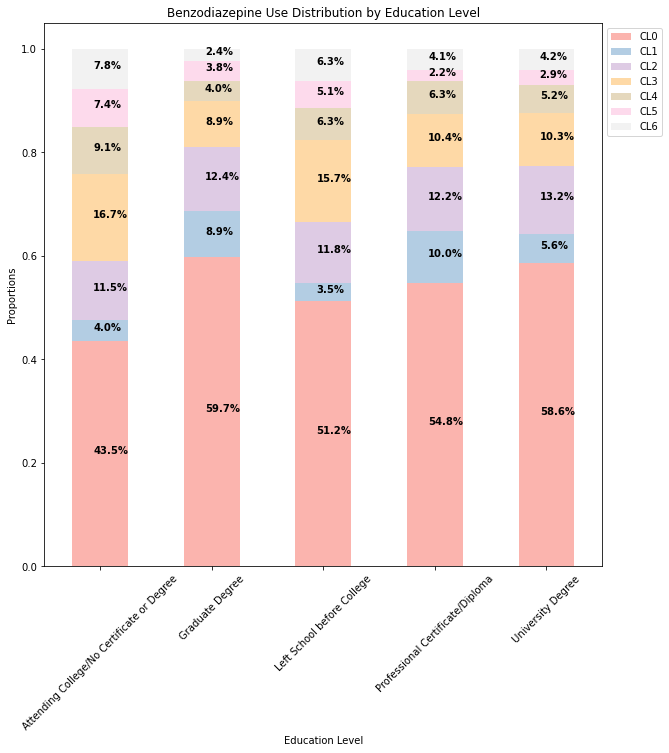

In [64]:
stacked_bar('education', 'benzos', 'Pastel1', 'Education Level','Benzodiazepine Use Distribution by Education Level')

Again, the distributions of benzo use per education level are similar, with the majority having never used the drug. We also see, again, that those attending college use the drug the most. We are seeing this similar trend, likely due to the fact that kids in college tend to explore a lot of new things as well as party a lot, which explains the higher levels of drug use. 

We also see that the levels of benzo use among university and graduate degree holders are higher than the cocaine use levels, likely due to the fact that benzos are legal prescription drugs, so some people may be prescribed these due to underlying mental/physical health issues. 

### Principle Components Analysis on Drug Consumption Variables

To further explore the drug consumption variables, it will be very interesting to perform PCA on these variables. This technique will find linear combinations of the features that are uncorrelated with one another and order them by the amount of variance they explain. To do so, we must first turn all of the drug consumption variables into numerical variables. We will then transpose the data frame so each feature respresents a different respondent and each row represents a drug consumption attribute. 

In [65]:
#First, select all of the columns we will be using, and replace all string variables with numeric values.
df_t = df.copy(deep=True)
df_t = df_t[['alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis', 'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa']]
df_t = df_t.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])
                                            
df_t.head()

,alcohol,amphet,amyl,benzos,caffeine,cannabis,chocolate,cocaine,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0


In [66]:
#Transpose the dataframe
df_t = df_t.transpose()
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876
alcohol,5,5,6,4,4,2,6,5,4,6,...,5,6,6,4,4,5,5,4,5,4
amphet,2,2,0,0,1,0,0,0,0,1,...,0,0,2,0,3,0,0,6,0,3
amyl,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
benzos,2,0,0,3,0,0,0,0,0,1,...,0,0,6,0,3,0,0,5,0,3
caffeine,6,6,6,5,6,6,6,6,6,6,...,5,5,6,2,5,4,5,6,6,6


In [67]:
#Let's save the attribute names in a separate array
df_t_index = df_t.index
df_t_index

Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis',
       'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroin', 'ketamine',
       'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa'],
      dtype='object')

In [68]:
#Now, we can fit the PCA transformation on our transposed dataframe
drug_pca = PCA().fit(df_t)

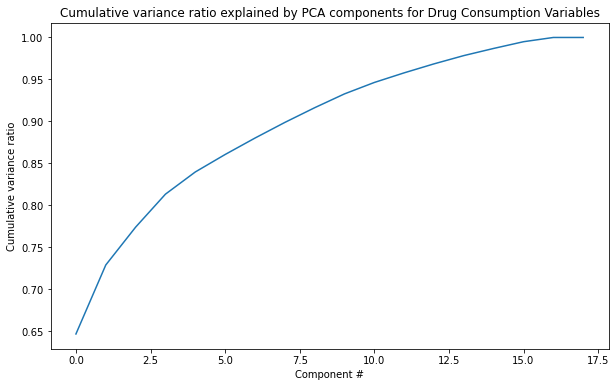

In [69]:
#Plot the cumulative variance ratio with number of components
plt.subplots(figsize=(10, 6))
plt.plot(drug_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative variance ratio')
plt.title('Cumulative variance ratio explained by PCA components for Drug Consumption Variables');

We can see the first two components account for about 73% of the total variance. 

In [70]:
#Let's now apply the PCA transformation to our data
drug_pca_x = drug_pca.transform(df_t)

In [71]:
drug_pca_x.shape

(18, 18)

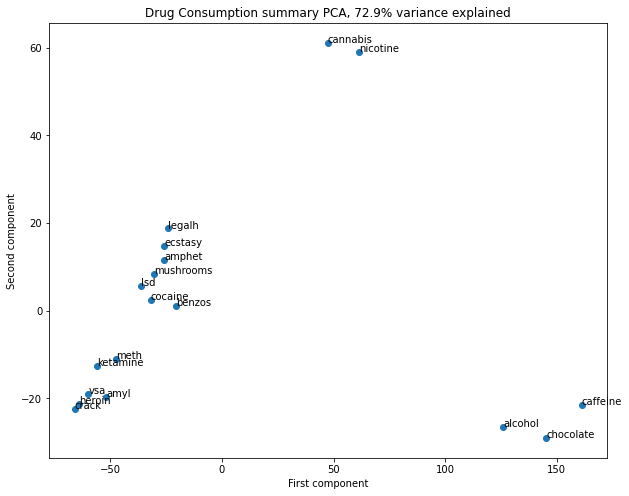

In [72]:
#Now, we plot the first two principle components from our drug_pca_x dataframe

x = drug_pca_x[:, 0]
y = drug_pca_x[:, 1]
drugs = df_t_index
pc_var = 100 * drug_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Drug Consumption summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(drugs, x, y):
    plt.annotate(s, (x, y))

This is a very interesting graph to analyze, as we see 4 distinct groupings of our drugs. The first grouping has cannabis and nicotine, both relatively mild drugs, where nicotine is completely legal and cannabis is known to be widely used. Another grouping we see is with alcohol, chocolate, and caffeine. These can be seen as the most commonly used substances, where virtually no harm is associated with moderate use of these three. Another group we see includes legal highs, ecstasy, amphetamines, magic mushrooms, LSD, cocaine, and benzodiazepines. These are all prescription drugs and 'party/designer drugs'. These are drugs that can certainly be considered detrimental to one's health, but people often times (especially in college) try once or more. The last grouping we have includes methadone, ketamine, heroin, crack, amyl nitrite, and volatile substance abuse. This grouping can be seen as the most severe and dangerous drugs that one could do, and we know these to be the least common drugs that the average person would partake in. 

### Feature Importance Using Random Forest

#### Multiclass Target Variables

Let's now use a Random Forest Classifier from the scikitlearn module to help find the feature importances of our predictor variables for each of the drugs we have been looking at (alcohol, cocaine, benzodiazapines). We will first have to convert the categorical predictor variables into separate dummy variables. Again, we will not be using residing country or race as predicting variables as the data we have does not include enough diversified samples for these to be meaningful. 

In [73]:
df_dummies = df[['age', 'gender', 'education', 'n_score','e_score', 'o_score', 'a_score', 'c_score', 'i_score', 's_score']]
df_dummies = pd.get_dummies(df_dummies)
df_dummies.head() 

,n_score,e_score,o_score,a_score,c_score,i_score,s_score,age_18-24,age_25-34,age_35-44,age_45-54,age_55+,gender_Female,gender_Male,education_Attending College/No Certificate or Degree,education_Graduate Degree,education_Left School before College,education_Professional Certificate/Diploma,education_University Degree
0,39.0,36.0,42.0,37.0,42.0,4.0,3.0,0,0,1,0,0,1,0,0,0,0,1,0
1,29.0,52.0,55.0,48.0,41.0,3.0,6.0,0,1,0,0,0,0,1,0,1,0,0,0
2,31.0,45.0,40.0,32.0,34.0,2.0,8.0,0,0,1,0,0,0,1,0,0,0,1,0
3,34.0,34.0,46.0,47.0,46.0,2.0,3.0,1,0,0,0,0,1,0,0,1,0,0,0
4,43.0,28.0,43.0,41.0,50.0,4.0,6.0,0,0,1,0,0,1,0,0,1,0,0,0


In [74]:
df_dummies.columns

Index(['n_score', 'e_score', 'o_score', 'a_score', 'c_score', 'i_score',
       's_score', 'age_18-24', 'age_25-34', 'age_35-44', 'age_45-54',
       'age_55+', 'gender_Female', 'gender_Male',
       'education_Attending College/No Certificate or Degree',
       'education_Graduate Degree', 'education_Left School before College',
       'education_Professional Certificate/Diploma',
       'education_University Degree'],
      dtype='object')

In [75]:
#import necessary package
from sklearn.ensemble import RandomForestClassifier

#Set predictor variables and target variable
X = df_dummies
y_alcohol = df.alcohol

In [76]:
#Initialize the random forest classifier and fit it on the training data
rf_alcohol = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_alcohol.fit(X, y_alcohol)

RandomForestClassifier(random_state=42)

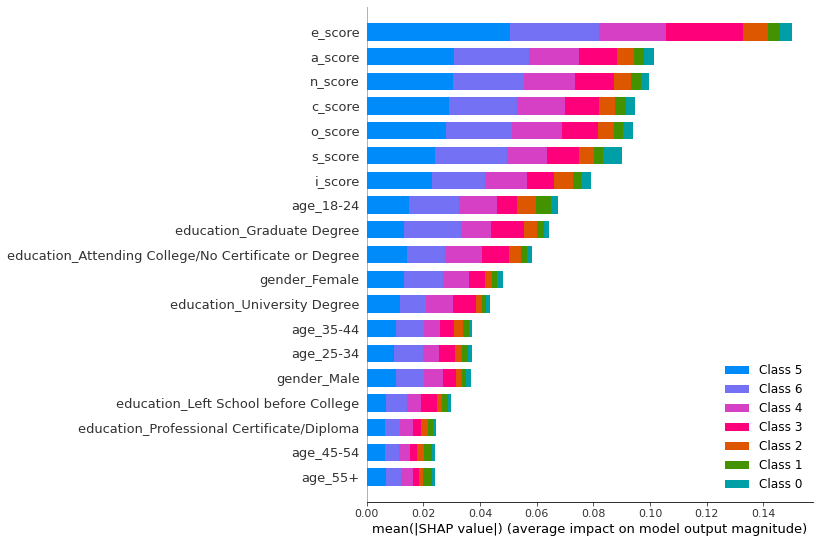

In [77]:
#Using shap library to find Feature Importance from our Random Forest Classifier for alcohol
import shap
shap.initjs()

explainer_alcohol = shap.TreeExplainer(rf_alcohol)
shap_values_alcohol = explainer_alcohol.shap_values(X)
shap.summary_plot(shap_values_alcohol, features = X, feature_names = X.columns)

We can see all of the personality features hold the most importance for alcohol use, with extraversion being at the top. The older age groups hold little significance. 

In [78]:
y_cocaine = df.cocaine

rf_cocaine = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_cocaine.fit(X, y_cocaine)

RandomForestClassifier(random_state=42)

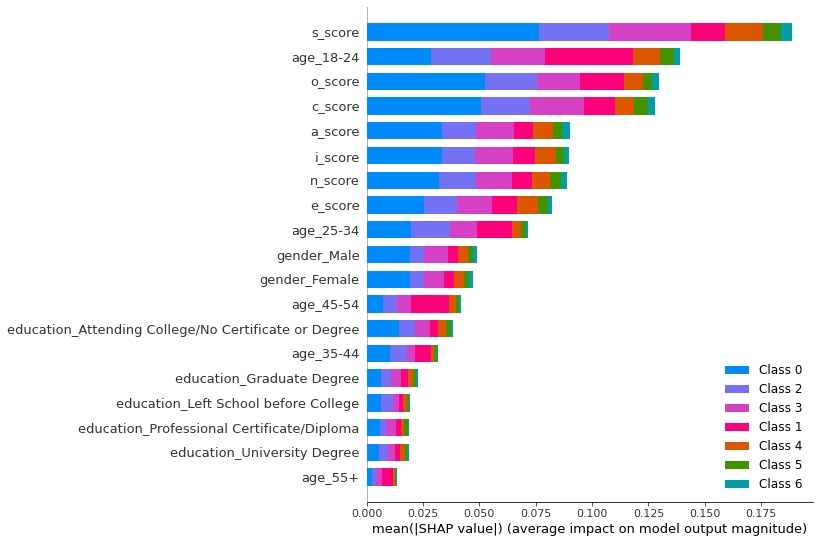

In [79]:
#Using shap library to find Feature Importance from our Random Forest Classifier for cocaine

explainer_cocaine = shap.TreeExplainer(rf_cocaine)
shap_values_cocaine = explainer_cocaine.shap_values(X)
shap.summary_plot(shap_values_cocaine, features = X, feature_names = X.columns)

Here, we see sensation seeking holding the most importance for concaine use, followed by the youngest age group and the remaining personality features. Most of the education groups as well as the older age groups hold the least importance. 

In [80]:
y_benzos = df.benzos

rf_benzos = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_benzos.fit(X, y_benzos)

RandomForestClassifier(random_state=42)

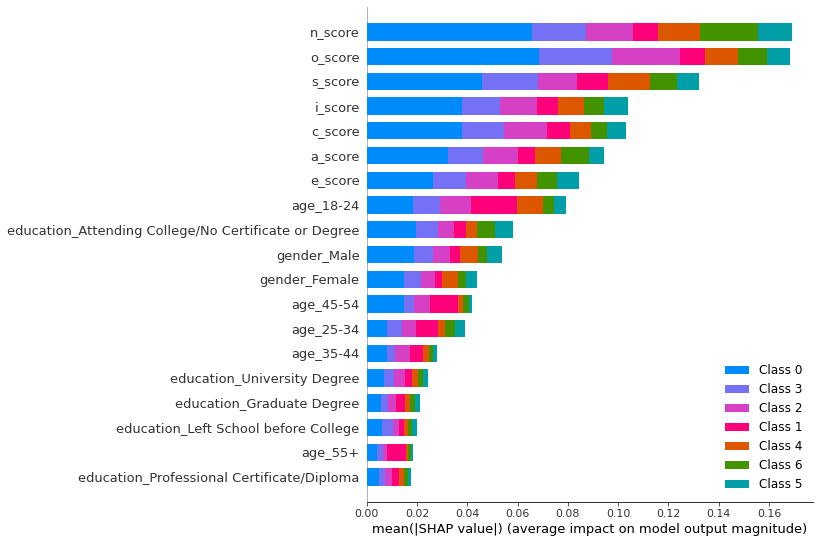

In [81]:
#Using shap library to find Feature Importance from our Random Forest Classifier for benzos

explainer_benzos = shap.TreeExplainer(rf_benzos)
shap_values_benzos = explainer_benzos.shap_values(X)
shap.summary_plot(shap_values_benzos, features = X, feature_names = X.columns)

For benzodiazapine use, we can see once again that all of the personality features hold the most importance, with neuroticism and oppenness to experience being at the top. For the categorical variables, those who are 18-24, and those attending college also hold lots of significance. For all of the drugs, the oldest age groups and the other education levels (besides attending college) hold the least significance. 

#### Binary Class Target Variables

Let's now try the same thing for all three substances, but lets turn our target variables into binary classes, as this will be how the data is structured when we begin the modeling the data. We will define our target values as 1 for User and 0 for Non-user. Those who have smoked within the last month will be defined as Users for now, and those who have not will be defined as non Users.

In [82]:
df_drugs = df[['alcohol', 'benzos', 'cocaine']]
df_drugs = df_drugs.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,0,0,0,1,1,1]) 

In [83]:
y_alcohol2 = df_drugs.alcohol

rf_alcohol2 = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_alcohol2.fit(X, y_alcohol2)

RandomForestClassifier(random_state=42)

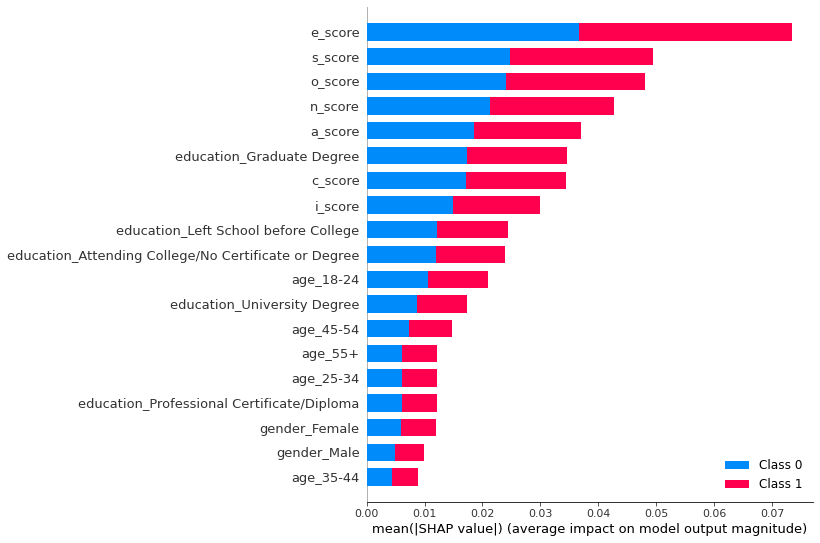

In [84]:
explainer_alcohol2 = shap.TreeExplainer(rf_alcohol2)
shap_values_alcohol2 = explainer_alcohol2.shap_values(X)
shap.summary_plot(shap_values_alcohol2, features = X, feature_names = X.columns)

We now see that extraversion again holds the most importance, but sensation seeking and openness to experience hold next to most importance. We also see that the older age groups now have more significance than before. Next up is cocaine.

In [85]:
y_cocaine2 = df_drugs.cocaine

rf_cocaine2 = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_cocaine2.fit(X, y_cocaine2)

RandomForestClassifier(random_state=42)

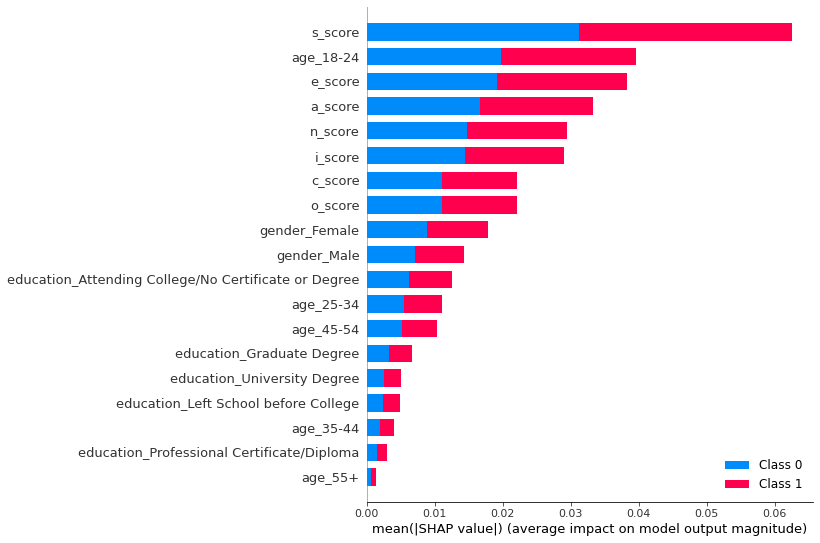

In [86]:
explainer_cocaine2 = shap.TreeExplainer(rf_cocaine2)
shap_values_cocaine2 = explainer_cocaine2.shap_values(X)
shap.summary_plot(shap_values_cocaine2, features = X, feature_names = X.columns)

We see this is pretty similar to the multiclass feature significance for cocaine, however some of the personality variables are switched around. 

In [87]:
y_benzos2 = df_drugs.benzos

rf_benzos2 = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_benzos2.fit(X, y_benzos2)

RandomForestClassifier(random_state=42)

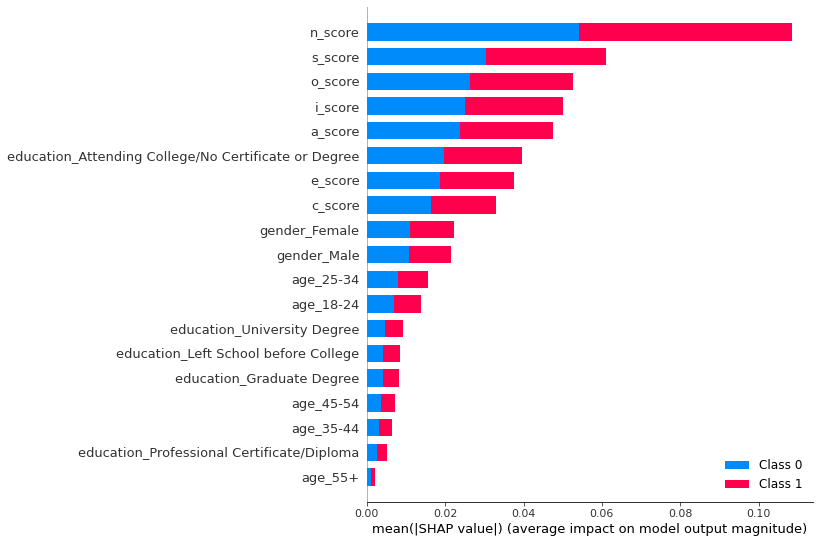

In [88]:
explainer_benzos2 = shap.TreeExplainer(rf_benzos2)
shap_values_benzos2 = explainer_benzos2.shap_values(X)
shap.summary_plot(shap_values_benzos2, features = X, feature_names = X.columns)

We now see neuroticism holds significantly more significance than the rest of the features, which is different from before where neuroticism and openness to experience were about equal. We also see the youngest age group dropped down a bit in significance.

### Feature Importance Using Regression Analysis

We will now find the feature importances of our predictor variables for each of the drugs we have been looking at (alcohol, cocaine, benzodiazapines), but this time using Regression Analysis. Again, we will not be using residing country or race as predicting variables as the data we have does not include enough diversified samples for these to be truly meaningful. The first step for this is to normalize our features, and we will do so using RobustScaler from the sklearn package. 

In [89]:
#Create new data frame, converting categorical vars to dummy vars, and dropping one category from each variable

df_dummies2 = df[['age', 'gender', 'education', 'n_score','e_score', 'o_score', 'a_score', 'c_score', 'i_score', 's_score']]
df_dummies2 = pd.get_dummies(df_dummies2, drop_first=True)
df_dummies2.head()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,education_Graduate Degree,education_Left School before College,education_Professional Certificate/Diploma,education_University Degree
0,39.0,36.0,42.0,37.0,42.0,4.0,3.0,0,1,0,0,0,0,0,1,0
1,29.0,52.0,55.0,48.0,41.0,3.0,6.0,1,0,0,0,1,1,0,0,0
2,31.0,45.0,40.0,32.0,34.0,2.0,8.0,0,1,0,0,1,0,0,1,0
3,34.0,34.0,46.0,47.0,46.0,2.0,3.0,0,0,0,0,0,1,0,0,0
4,43.0,28.0,43.0,41.0,50.0,4.0,6.0,0,1,0,0,0,1,0,0,0


In [90]:
df_dummies2.columns

Index(['n_score', 'e_score', 'o_score', 'a_score', 'c_score', 'i_score',
       's_score', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55+',
       'gender_Male', 'education_Graduate Degree',
       'education_Left School before College',
       'education_Professional Certificate/Diploma',
       'education_University Degree'],
      dtype='object')

In [91]:
fi_reg_num = df_dummies2[['n_score','e_score', 'o_score', 'a_score', 'c_score', 'i_score', 's_score']]
fi_reg_cat = df_dummies2[['age_25-34', 'age_35-44', 'age_45-54', 'age_55+', 'gender_Male', 
                          'education_Graduate Degree', 'education_Left School before College',
                          'education_Professional Certificate/Diploma', 'education_University Degree']]

In [92]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit_transform(fi_reg_num)
fi_reg = pd.DataFrame(scaler, columns=fi_reg_num.columns)
fi_reg = pd.concat([fi_reg, fi_reg_cat], axis=1)
fi_reg.head()

,n_score,e_score,o_score,a_score,c_score,i_score,s_score,age_25-34,age_35-44,age_45-54,age_55+,gender_Male,education_Graduate Degree,education_Left School before College,education_Professional Certificate/Diploma,education_University Degree
0,0.230769,-0.444444,-0.4,-0.666667,0.000000,0.000000,-1.00,0,1,0,0,0,0,0,1,0
1,-0.538462,1.333333,0.9,0.555556,-0.111111,-0.333333,-0.25,1,0,0,0,1,1,0,0,0
2,-0.384615,0.555556,-0.6,-1.222222,-0.888889,-0.666667,0.25,0,1,0,0,1,0,0,1,0
3,-0.153846,-0.666667,0.0,0.444444,0.444444,-0.666667,-1.00,0,0,0,0,0,1,0,0,0
4,0.538462,-1.333333,-0.3,-0.222222,0.888889,0.000000,-0.25,0,1,0,0,0,1,0,0,0


In [93]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
#Let's check the Variance Inflation Factors to assess multicollinearity in the variables. 
vif_data = pd.DataFrame()
vif_data["feature"] = fi_reg.columns
vif_data["VIF"] = [variance_inflation_factor(fi_reg.values, i) for i in range(len(fi_reg.columns))]

In [95]:
vif_data.round(1)

,feature,VIF
0,n_score,1.5
1,e_score,1.5
2,o_score,1.3
3,a_score,1.2
4,c_score,1.5
5,i_score,2.0
6,s_score,2.1
7,age_25-34,1.8
8,age_35-44,1.7
9,age_45-54,1.7


We see none of the variables have a VIF above 10 so we do not need to get rid of any of the variables. 

We need to make them binary for the logistic regression to work, so we will again use the df_drugs dataset defined previously for our analysis where our target values are 1 for User and 0 for Non-user. Those who have smoked within the last month will be defined as Users for now, and those who have not will be defined as non Users.

In [96]:
#Let's now run logistic regression on this scaled data to obtain coefficients for target vars, starting with alcohol
sm.add_constant(fi_reg)
lr_alcohol = sm.Logit(df_drugs.alcohol, fi_reg).fit()
lr_alcohol.summary()

Optimization terminated successfully.
         Current function value: 0.474752
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                alcohol   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 May 2022   Pseudo R-squ.:                -0.01741
Time:                        08:15:32   Log-Likelihood:                -891.11
converged:                       True   LL-Null:                       -875.86
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
n_score                                        0.1284      0.101      1.273      0.203      -0.069       0.326
e_score                                        0.3972      0.097      4.114      0.000       0.208       0.586
o_score                                       -0.0228      0.104     -0.220      0.826      -0.226       0.180
a_score                                        0.1400      0.090      1.548      0.122      -0.037       0.317
c_score                                       -0.1608      0.093     -1.738      0.082      -0.342       0.021
i_score                                        0.1200      0.108      1.107      0.268      -0.093       0.333
s_score                                        0.1653      0.125      1.322      0.186      -0.080       0.410
age_25-34                                      0.3405      0.160      2.129      0.033       0.027       0.654
age_35-44                                      0.3601      0.179      2.017      0.044       0.010       0.710
age_45-54                                      0.1996      0.191      1.047      0.295      -0.174       0.573
age_55+                                       -0.0944      0.258     -0.365      0.715      -0.601       0.412
gender_Male                                    0.7244      0.110      6.556      0.000       0.508       0.941
education_Graduate Degree                      1.7583      0.205      8.562      0.000       1.356       2.161
education_Left School before College           0.6435      0.176      3.661      0.000       0.299       0.988
education_Professional Certificate/Diploma     0.8238      0.189      4.356      0.000       0.453       1.195
education_University Degree                    1.4054      0.160      8.767      0.000       1.091       1.720
==============================================================================================================
"""

In [97]:
#Next, run logistic regression without scaling the features
sm.add_constant(df_dummies2)
lr_alcohol_unscaled = sm.Logit(df_drugs.alcohol, df_dummies2).fit()
lr_alcohol_unscaled.summary()

Optimization terminated successfully.
         Current function value: 0.445285
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                alcohol   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 May 2022   Pseudo R-squ.:                 0.04574
Time:                        08:15:32   Log-Likelihood:                -835.80
converged:                       True   LL-Null:                       -875.86
Covariance Type:            nonrobust   LLR p-value:                 6.654e-11
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
n_score                                        0.0052      0.007      0.795      0.427      -0.008       0.018
e_score                                        0.0488      0.011      4.517      0.000       0.028       0.070
o_score                                       -0.0125      0.010     -1.204      0.229      -0.033       0.008
a_score                                        0.0032      0.009      0.342      0.733      -0.015       0.022
c_score                                       -0.0106      0.010     -1.088      0.277      -0.030       0.009
i_score                                       -0.0568      0.039     -1.471      0.141      -0.132       0.019
s_score                                        0.0867      0.033      2.638      0.008       0.022       0.151
age_25-34                                     -0.3344      0.179     -1.865      0.062      -0.686       0.017
age_35-44                                     -0.3031      0.194     -1.565      0.118      -0.683       0.077
age_45-54                                     -0.4203      0.204     -2.063      0.039      -0.820      -0.021
age_55+                                       -0.6519      0.262     -2.486      0.013      -1.166      -0.138
gender_Male                                   -0.0507      0.132     -0.384      0.701      -0.309       0.208
education_Graduate Degree                      1.0123      0.225      4.509      0.000       0.572       1.452
education_Left School before College          -0.0759      0.193     -0.392      0.695      -0.455       0.303
education_Professional Certificate/Diploma     0.1818      0.205      0.889      0.374      -0.219       0.583
education_University Degree                    0.6003      0.186      3.229      0.001       0.236       0.965
==============================================================================================================
"""

In [98]:
#Do the same for cocaine
lr_cocaine = sm.Logit(df_drugs.cocaine, fi_reg).fit()
lr_cocaine.summary()

Optimization terminated successfully.
         Current function value: 0.291232
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                cocaine   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 May 2022   Pseudo R-squ.:                -0.01270
Time:                        08:15:33   Log-Likelihood:                -546.64
converged:                       True   LL-Null:                       -539.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
n_score                                        0.2305      0.131      1.763      0.078      -0.026       0.487
e_score                                        0.2316      0.124      1.867      0.062      -0.012       0.475
o_score                                       -0.2518      0.137     -1.837      0.066      -0.520       0.017
a_score                                       -0.4731      0.116     -4.082      0.000      -0.700      -0.246
c_score                                        0.1346      0.118      1.139      0.255      -0.097       0.366
i_score                                       -0.4002      0.141     -2.836      0.005      -0.677      -0.124
s_score                                        0.8184      0.176      4.654      0.000       0.474       1.163
age_25-34                                     -0.9621      0.197     -4.873      0.000      -1.349      -0.575
age_35-44                                     -1.7091      0.295     -5.795      0.000      -2.287      -1.131
age_45-54                                     -2.4955      0.472     -5.291      0.000      -3.420      -1.571
age_55+                                       -2.3641      0.732     -3.230      0.001      -3.799      -0.930
gender_Male                                   -1.0241      0.140     -7.338      0.000      -1.298      -0.751
education_Graduate Degree                     -1.1012      0.249     -4.415      0.000      -1.590      -0.612
education_Left School before College          -1.1182      0.260     -4.303      0.000      -1.628      -0.609
education_Professional Certificate/Diploma    -0.8592      0.292     -2.947      0.003      -1.431      -0.288
education_University Degree                   -1.3697      0.210     -6.523      0.000      -1.781      -0.958
==============================================================================================================
"""

In [99]:
lr_cocaine_unscaled = sm.Logit(df_drugs.cocaine, df_dummies2).fit()
lr_cocaine_unscaled.summary()

Optimization terminated successfully.
         Current function value: 0.252957
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                cocaine   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.1204
Time:                        08:15:33   Log-Likelihood:                -474.80
converged:                       True   LL-Null:                       -539.79
Covariance Type:            nonrobust   LLR p-value:                 2.150e-20
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
n_score                                        0.0105      0.009      1.176      0.240      -0.007       0.028
e_score                                        0.0149      0.014      1.056      0.291      -0.013       0.043
o_score                                       -0.0249      0.014     -1.750      0.080      -0.053       0.003
a_score                                       -0.0592      0.013     -4.657      0.000      -0.084      -0.034
c_score                                       -0.0210      0.013     -1.604      0.109      -0.047       0.005
i_score                                       -0.0220      0.052     -0.421      0.674      -0.125       0.081
s_score                                        0.1964      0.050      3.961      0.000       0.099       0.294
age_25-34                                     -0.2981      0.216     -1.379      0.168      -0.722       0.126
age_35-44                                     -1.0597      0.310     -3.422      0.001      -1.667      -0.453
age_45-54                                     -1.8774      0.480     -3.912      0.000      -2.818      -0.937
age_55+                                       -1.7770      0.735     -2.419      0.016      -3.217      -0.337
gender_Male                                    0.2753      0.189      1.453      0.146      -0.096       0.647
education_Graduate Degree                      0.3087      0.289      1.067      0.286      -0.258       0.876
education_Left School before College          -0.1384      0.284     -0.486      0.627      -0.696       0.419
education_Professional Certificate/Diploma     0.1082      0.315      0.344      0.731      -0.509       0.726
education_University Degree                    0.0206      0.253      0.081      0.935      -0.476       0.517
==============================================================================================================
"""

In [100]:
#Do the same for benzos
lr_benzos = sm.Logit(df_drugs.benzos, fi_reg).fit()
lr_benzos.summary()

Optimization terminated successfully.
         Current function value: 0.416904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 benzos   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 May 2022   Pseudo R-squ.:                 0.04733
Time:                        08:15:33   Log-Likelihood:                -782.53
converged:                       True   LL-Null:                       -821.40
Covariance Type:            nonrobust   LLR p-value:                 1.798e-10
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
n_score                                        0.6619      0.110      6.018      0.000       0.446       0.877
e_score                                       -0.0931      0.100     -0.928      0.354      -0.290       0.104
o_score                                        0.1361      0.112      1.218      0.223      -0.083       0.355
a_score                                       -0.3260      0.095     -3.437      0.001      -0.512      -0.140
c_score                                        0.1801      0.098      1.847      0.065      -0.011       0.371
i_score                                       -0.1336      0.114     -1.175      0.240      -0.357       0.089
s_score                                        0.5455      0.137      3.984      0.000       0.277       0.814
age_25-34                                     -0.3289      0.160     -2.056      0.040      -0.643      -0.015
age_35-44                                     -0.9038      0.209     -4.322      0.000      -1.314      -0.494
age_45-54                                     -0.6005      0.224     -2.687      0.007      -1.039      -0.162
age_55+                                       -0.7625      0.362     -2.109      0.035      -1.471      -0.054
gender_Male                                   -0.6012      0.115     -5.246      0.000      -0.826      -0.377
education_Graduate Degree                     -1.4483      0.210     -6.902      0.000      -1.860      -1.037
education_Left School before College          -0.8949      0.193     -4.639      0.000      -1.273      -0.517
education_Professional Certificate/Diploma    -1.0864      0.220     -4.939      0.000      -1.518      -0.655
education_University Degree                   -1.4017      0.169     -8.274      0.000      -1.734      -1.070
==============================================================================================================
"""

In [101]:
lr_benzos_unscaled = sm.Logit(df_drugs.benzos, df_dummies2).fit()
lr_benzos_unscaled.summary()

Optimization terminated successfully.
         Current function value: 0.389860
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 benzos   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                           15
Date:                Thu, 12 May 2022   Pseudo R-squ.:                  0.1091
Time:                        08:15:33   Log-Likelihood:                -731.77
converged:                       True   LL-Null:                       -821.40
Covariance Type:            nonrobust   LLR p-value:                 3.333e-30
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
n_score                                        0.0342      0.007      4.886      0.000       0.020       0.048
e_score                                       -0.0293      0.011     -2.665      0.008      -0.051      -0.008
o_score                                        0.0072      0.011      0.653      0.514      -0.014       0.029
a_score                                       -0.0506      0.010     -5.118      0.000      -0.070      -0.031
c_score                                       -0.0158      0.010     -1.564      0.118      -0.036       0.004
i_score                                        0.0287      0.040      0.723      0.470      -0.049       0.107
s_score                                        0.1037      0.036      2.904      0.004       0.034       0.174
age_25-34                                      0.2221      0.176      1.263      0.207      -0.123       0.567
age_35-44                                     -0.3824      0.222     -1.719      0.086      -0.818       0.054
age_45-54                                     -0.1171      0.235     -0.498      0.619      -0.578       0.344
age_55+                                       -0.3485      0.365     -0.956      0.339      -1.063       0.366
gender_Male                                    0.1711      0.142      1.205      0.228      -0.107       0.449
education_Graduate Degree                     -0.5480      0.231     -2.371      0.018      -1.001      -0.095
education_Left School before College          -0.2690      0.209     -1.285      0.199      -0.679       0.141
education_Professional Certificate/Diploma    -0.4431      0.236     -1.878      0.060      -0.906       0.019
education_University Degree                   -0.5207      0.194     -2.680      0.007      -0.902      -0.140
==============================================================================================================
"""

# Conclusion

We have learned quite a bit about our drug consumption dataset from this brief analysis. Firstly, from the below distributions of alcohol, cocaine, and benzodiazapines, we learned that the majority of our respondents consume alcohol quite frequently (within the last day, week, or month). Very few respondents have never tried alcohol, while the majority of the respondents have never tried cocaine or benzos. There are slightly more regular users of benzos than cocaine in our sample, likely due to the fact that benzos are legal prescription drugs while cocaine is illegal. 

Also, after some hypothesis testing, we learned that there is a statistically significant difference in s-score (or sensation-seeking) between men and women, in that men seem to have a higher score for this personality trait due to some underlying reason. We see a similar trend in our data with i-score (impulsivity), as well as the opposite trend with a-score (agreeableness) and c-score (conscientiousness). 

In regards to age, we saw the trend that neuroticism, openness to experience, impulsivity and sensation-seeking tend to go down as one’s age increases, while conscientiousness tends to go up with age. For education levels, we see some of the highest scores for openness to experience and sensation seeking among those currently attending college, which does make sense. We also see that agreeableness and conscientiousness tends to rise with increasing levels of formal education. 

Again, when looking at drug use, we found that most of our respondents consume alcohol quite regularly, particularly in the past day or week, while cocaine and benzodiazepines are a different story. We found in our dataset that slightly more men consumed alcohol in the last day than women, while slightly more woman consumed alcohol in the past week. While the total for these two categories were about the same for men and women, this may suggest that men are more likely to consume alcohol even more frequently (and even abuse alcohol more frequently) than women. We found that there were far more women who never tried cocaine or benzos than men, so more men have tried (or continue to use) these drugs than women. With benzos, however, those who used in the last day were about the same between both genders, possibly due to the fact that it is a legal, prescription drug. Those who hold a university degree tend to drink alcohol most frequently, followed by those attending college and those holding a graduate degree. Those attending college hold the largest percentage of past or present cocaine and benzo users. 

After conducting Principal Components Analysis, we found 4 major categories of drug users from 2 components explaining about 73 percent of the variance between the drug consumption variables. One for cannabis and nicotine, one for the perceived least dangerous substances and most widely accepted (alcohol, chocolate, caffeine), one for the party/college/prescription/hallucination drugs (LSD, ecstasy, cocaine, benzos, etc.), and one for the most dangerous and possibly most addicting drugs (heroin, crack, methadone, etc.). 

Lastly, after using random forest to find feature importances for the predictor variables for each of our drug categories of interest, we got some interesting findings. We see that for alcohol, neuroticism, oppenness to experience, and conscientiousness hold the most significance in regard to the personality variables, while the younger age groups also hold some significance. For cocaine use, we see neuroticism, oppenness to experience, and extraversion hold most significance, while those attending college also hold significance. For benzo use, the most significant personality variables are neuroticism, openness to experience, and conscientiousness, while those attending college as well as those who are female holds higher levels of significance as well. For all three drugs/substances, impulsivity and sensation-seeking hold the lowest significance out of the personality traits, and older age groups generally are at the bottom of significance levels as well. 